In [34]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [103]:
%matplotlib inline

In [7]:
ehrenbrav = pandas.read_csv("/home/peer/studium/bachelor/checkpoints/ehrenbrav_1 a3c_4/scores.txt",delimiter="\t", index_col=0)

In [8]:
main = pandas.read_csv("/home/peer/studium/bachelor/checkpoints/nes_a3c_scaled_finer_main_reward_1/scores.txt",delimiter="\t", index_col=0)

In [9]:
small = pandas.read_csv("/home/peer/studium/bachelor/checkpoints/main_reward_1/scores.txt",delimiter="\t", index_col=0)

In [10]:
coarse = pandas.read_csv("/home/peer/studium/bachelor/checkpoints/scaled_fine_main_reward_1/scores.txt",delimiter="\t", index_col=0)

In [52]:
with_points = pandas.read_csv("/home/peer/studium/bachelor/checkpoints/scaled_finer_main_reward_with_points_1/scores.txt",delimiter="\t", index_col=0)

In [53]:
frames = {"ehrenbrav":ehrenbrav,"main":main, "small":small, "coarse":coarse, "with_points":with_points}

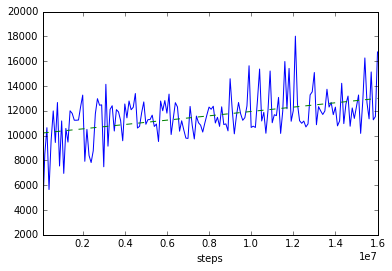

In [71]:
with_trendline(ehrenbrav["mean"])

<IPython.core.display.Javascript object>


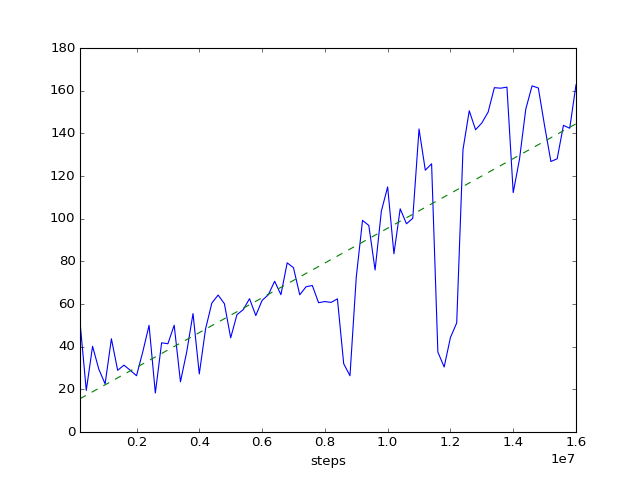

In [40]:
with_trendline(main["mean"])

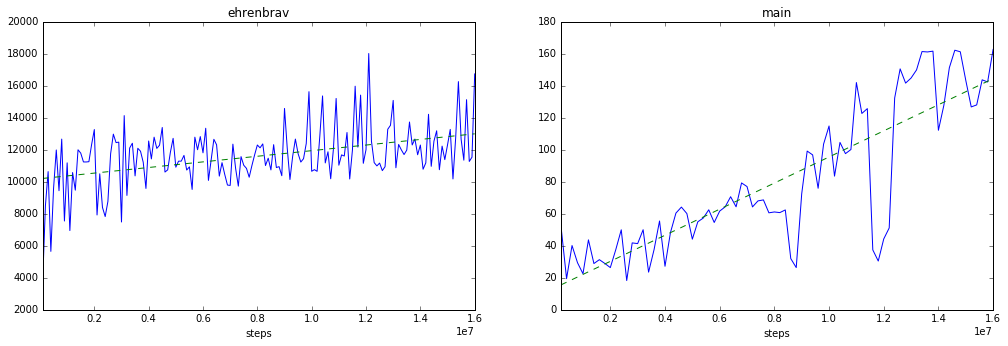

In [80]:
plt.axes([0, 0, 1, 1])
plt.title("ehrenbrav")
with_trendline(ehrenbrav["mean"])
plt.axes([1.2, 0, 1, 1])
plt.title("main")
with_trendline(main["mean"])

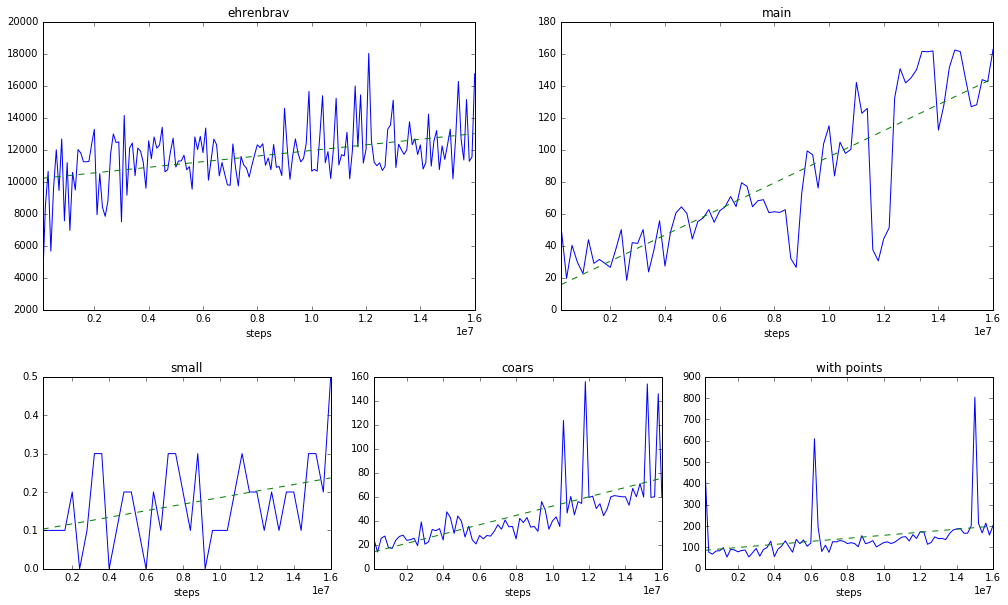

In [114]:
f = plt.figure()
aa = f.add_axes([0, 0, 1, 1])
plt.title("ehrenbrav")
with_trendline(ehrenbrav["mean"],ax=aa)

ab = f.add_axes([1.2, 0, 1, 1])
plt.title("main")
with_trendline(main["mean"],ax=ab)

ac = f.add_axes([0, -0.9, 2/3, 2/3])
plt.title("small")
with_trendline(small["mean"], ax=ac)

ad = f.add_axes([2*1/3 +0.1, -0.9, 2/3, 2/3])
plt.title("coars")
with_trendline(coarse["mean"], ax=ad)

ae = f.add_axes([2*2/3 +0.2, -0.9, 2/3, 2/3])
plt.title("with points")
with_trendline(with_points["mean"], ax=ae)

f.savefig("/home/peer/ownCloud/bachelor/thesis-template/c-ego/images/learning_progress.pdf", bbox_inches='tight')

In [ ]:
with_trendline(main["mean"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2036c97d30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2036aafef0>], dtype=object)

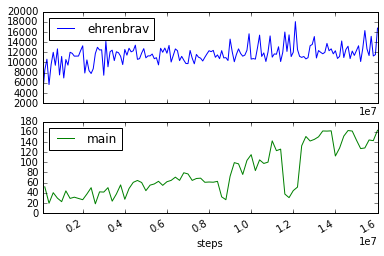

In [45]:
pandas.DataFrame({"ehrenbrav":ehrenbrav["mean"],"main":main["mean"]}).interpolate(method="index").plot(subplots=True, sharey=False, sharex=True )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f202feb8898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f202fd7b748>], dtype=object)

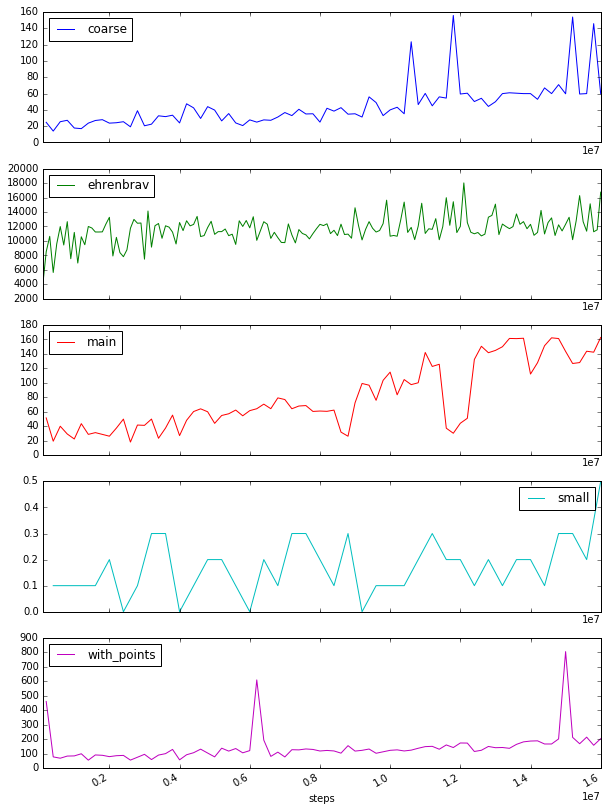

In [67]:
pandas.DataFrame({key:frame["mean"]for (key,frame)in frames.items()}).interpolate(method="index").plot(subplots=True, sharey=False, sharex=True,figsize=[10,15])

In [54]:
{key:frame["mean"]for (key,frame)in frames.items()}

{'coarse': steps
 200000       24.75
 400000       14.00
 600000       25.50
 800000       27.25
 1000000      17.75
 1200000      17.00
 1400000      23.75
 1600000      27.00
 1800000      28.00
 2000000      23.75
 2200000      24.25
 2400000      25.50
 2600000      19.25
 2800000      39.00
 3000000      20.50
 3200000      22.50
 3400000      32.75
 3600000      31.75
 3800000      33.50
 4000000      24.00
 4200000      47.50
 4400000      42.50
 4600000      29.50
 4800000      44.00
 5000000      39.75
 5200000      26.50
 5400000      35.50
 5600000      24.00
 5800000      20.75
 6000000      27.75
              ...  
 10200000     43.25
 10400000     35.25
 10600000    123.64
 10800000     46.50
 11000000     60.25
 11200000     45.00
 11400000     56.00
 11600000     54.50
 11800000    155.95
 12000000     59.50
 12200000     60.50
 12400000     50.25
 12600000     54.25
 12800000     44.25
 13000000     50.00
 13200000     60.00
 13400000     61.00
 13600000     60.50
 13

In [22]:
pandas.DataFrame?

In [102]:
def with_trendline(series, ax=None):
    series.plot(ax=ax)
    x = series.index
    y = series
    z = numpy.polyfit(x, y, 1)
    p = numpy.poly1d(z)
    if ax is not None:
        ax.plot(x,p(x),"--")
    else:
        plt.plot(x,p(x),"--")
